In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

### 1. Data Loading

1. Drop Duplicate Rows
2. Drop NaN
3. Converting Departure Time into int
4. COnverting Total Stops into Int DataType
5. Converting Date of Journey into Int DataType
6. Dropping Route, Arrival Time : Each is coorelated with the No. of Stops
7. Dropping Duration: Duration cannot be a valid user input but can be a pridiction

In [ ]:
raw_df = pd.read_csv('D:\\GUVI\\visual_studio\\Fligh Data\\Flight_Price.csv')

#changing the time into integer
raw_df['Dep_Time'] = pd.to_datetime(raw_df['Dep_Time'])
raw_df['Dep_Time']=raw_df['Dep_Time'].dt.strftime('%H%M%S').astype(int)

#drop duplicates
df = raw_df.drop_duplicates()
#drop nan (only 1 nan value)
df.dropna(inplace = True)

#converting the stops into int
pattern = '\D'
df.Total_Stops = df['Total_Stops'].str.replace(pattern, '', regex=True)
df.Total_Stops=df.Total_Stops.replace("", 0)
df.Total_Stops = df['Total_Stops'].astype('int')

#uniform additional info
df.Additional_Info.replace('No info', 'No Info', inplace=True)

#dropping Arrival time, Route, and Duration
df.drop(['Route', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

#changing Date of Journey into int value using toordinal
import datetime as dt
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)
df['Date_of_Journey']=df['Date_of_Journey'].map(dt.datetime.toordinal)



<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\com2a\AppData\Local\Temp\ipykernel_9520\1264250900.py:11: SyntaxWarning: invalid escape sequence '\D'
  pattern = '\D'
C:\Users\com2a\AppData\Local\Temp\ipykernel_9520\1264250900.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_df['Dep_Time'] = pd.to_datetime(raw_df['Dep_Time'])
C:\Users\com2a\AppData\Local\Temp\ipykernel_9520\1264250900.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)
C:\Users\com2a\AppData\Local\Temp\ipykernel_9520\1264250900.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price
0,IndiGo,737142,Banglore,New Delhi,222000,0,No Info,3897
1,Air India,737180,Kolkata,Banglore,55000,2,No Info,7662
2,Jet Airways,737219,Delhi,Cochin,92500,2,No Info,13882
3,IndiGo,737191,Kolkata,Banglore,180500,1,No Info,6218
4,IndiGo,737119,Banglore,New Delhi,165000,1,No Info,13302


### 2. Treating outliers in flight price

In [26]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr



In [27]:
q3

np.float64(12344.75)

In [28]:
lb

np.float64(-5457.125)

In [29]:
df['Price'] = np.where(df['Price']>ub,q3,df['Price'] )
df['Price'] = np.where(df['Price']<lb,q1,df['Price'] )

C:\Users\com2a\AppData\Local\Temp\ipykernel_9520\3970942558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = np.where(df['Price']>ub,q3,df['Price'] )
C:\Users\com2a\AppData\Local\Temp\ipykernel_9520\3970942558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = np.where(df['Price']<lb,q1,df['Price'] )


<Axes: ylabel='Price'>

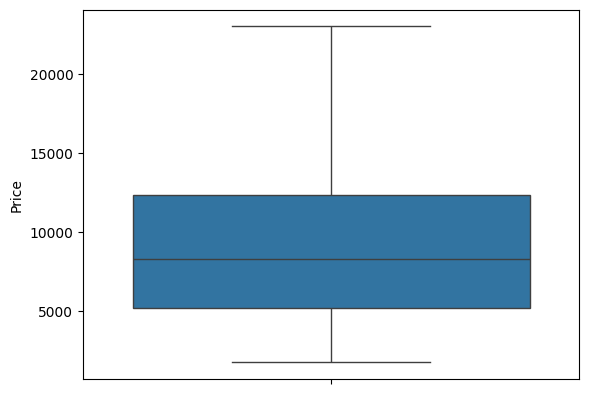

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data = df['Price'])

In [31]:
df['Price'].max()

np.float64(23001.0)

### 3. Splitting data into x and y, i.e., independent variables and target variabl

1. Splitting data into dependent and independent variables
2. One Hot Encoding of categorical independent variables

In [32]:
x = df.drop('Price', axis = 1)
y = df.Price
# import datetime as dt
# x.Date_of_Journey = pd.to_datetime(x.Date_of_Journey)
# x['Date_of_Journey']=x['Date_of_Journey'].map(dt.datetime.toordinal)
x = pd.get_dummies(x, dtype=int)




In [33]:
x.head()

,Date_of_Journey,Dep_Time,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,737142,222000,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,737180,55000,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,737219,92500,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,737191,180500,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,737119,165000,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


### 4. Creating Models

#### 1. LINEAR REGRESSION MODEL SKLEARN

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [94]:
regression_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [35]:
rg1_train_score = regression_model.score(x_train, y_train)
rg1_test_score = regression_model.score(x_test, y_test)

print(rg1_train_score, rg1_test_score)

0.6970599609017286 0.7057643693114961


#### 2. DECISION TREE

In [36]:
dt_model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
y_pred = dt_model.predict(x_test)
y_pred_train = dt_model.predict(x_train)

In [38]:
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
r_scored = r2_score(y_train, y_pred_train)
rmse = np.sqrt(mse)

print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('R2 Score = ',r_scored)
print('Root Mean Square Error = ',rmse)

Mean Absolute Error =  231.78581020008713
Mean Squared Error =  414576.1260185077
R2 Score =  0.9748518149324179
Root Mean Square Error =  643.8758622735502


In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_scored = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('R2 Score = ',r_scored)
print('Root Mean Square Error = ',rmse)

Mean Absolute Error =  738.6548162644053
Mean Squared Error =  2340074.7779339175
R2 Score =  0.858959857718077
Root Mean Square Error =  1529.730295814892


R2 for Teating is 86% and R2 for Training is 97.5%  
thus model is over-fitted
Reguralization is required

In [40]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ['imp'], index = x_train.columns).sort_values(by = 'imp', ascending=False))

                                                   imp
Total_Stops                                   0.499252
Date_of_Journey                               0.136859
Airline_Jet Airways                           0.090524
Dep_Time                                      0.082233
Additional_Info_In-flight meal not included   0.079915
Airline_Multiple carriers                     0.030910
Airline_Air India                             0.010526
Destination_Hyderabad                         0.009554
Airline_IndiGo                                0.008700
Airline_Vistara                               0.008541
Source_Delhi                                  0.007934
Destination_Banglore                          0.007362
Additional_Info_No Info                       0.005121
Source_Kolkata                                0.004295
Destination_Cochin                            0.002688
Destination_New Delhi                         0.002527
Airline_Multiple carriers Premium economy     0.002310
Airline_Go

In [42]:
import mlflow
import mlflow.sklearn
experiment = mlflow.set_experiment("flight_price_experiment1")
mlflow.set_tracking_uri('http://127.0.0.1:5000')
with mlflow.start_run(run_name = 'Decision Tree'):
    
    mlflow.log_metric('MAE', mae)
    mlflow.log_metric('MSE', mse)
    mlflow.log_metric('R2', r_scored)
    mlflow.log_metric('RMSE', rmse)
    mlflow.sklearn.log_model(dt_model,'Decision Tree')

2025/01/21 22:04:38 INFO mlflow.tracking.fluent: Experiment with name 'flight_price_experiment1' does not exist. Creating a new experiment.
2025/01/21 22:04:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/275897444132354466/runs/ce7093e1e9874e77918b2e34f5b0b6f4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/275897444132354466


DECISION TREE REGURALIZATION

In [43]:
dt_model1 = DecisionTreeRegressor(criterion = 'absolute_error', max_depth= 7, min_samples_leaf = 70, min_samples_split = 220)
dt_model1.fit(x_train, y_train)



DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=70, min_samples_split=220)

In [44]:
dt_model1.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=70, min_samples_split=220)>

In [75]:
Parameters = {'criterion':'absolute_error', 'max_depth':7,
                      'min_samples_leaf':70, 'min_samples_split':220}

In [76]:
Parameters

{'criterion': 'absolute_error',
 'max_depth': 7,
 'min_samples_leaf': 70,
 'min_samples_split': 220}

In [45]:
y_reg_predict_train = dt_model1.predict(x_train)
y_reg_predict_test = dt_model1.predict(x_test)
r_scored_training = r2_score(y_train, y_reg_predict_train)
r_scored_testing = r2_score(y_test, y_reg_predict_test)
print('Training R2 Score = ',r_scored_training)
print('Testing R2 Score = ',r_scored_testing)

Training R2 Score =  0.7779358965213513
Testing R2 Score =  0.7836714401067051


In [48]:
mae = mean_absolute_error(y_test, y_reg_predict_test)
mse = mean_squared_error(y_test, y_reg_predict_test)
r_scored = r2_score(y_test, y_reg_predict_test)
rmse = np.sqrt(mse)

print('Testing R2 Score = ',r_scored)

Testing R2 Score =  0.7836714401067051


In [83]:
import mlflow
import mlflow.sklearn
experiment = mlflow.set_experiment("experiment6")
mlflow.set_tracking_uri('http://127.0.0.1:5000')
with mlflow.start_run(run_name = 'Decision_Tree_params1'):
    mlflow.log_params(Parameters)
    mlflow.log_metric('MAE', mae)
    mlflow.log_metric('MSE', mse)
    mlflow.log_metric('R2', r_scored)
    mlflow.log_metric('RMSE', rmse)
    mlflow.sklearn.log_model(dt_model1,'Decision_Tree_Params1')

2025/01/16 02:26:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision_Tree_params1 at: http://127.0.0.1:5000/#/experiments/425576292287752091/runs/79eae0ecf2a34980b9fb09f44fb7abf1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/425576292287752091


GRID SEARCH CV OF DECISION TREE

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameter_grid = {
    'max_depth' : [24, 25, 26, 27],
    'min_samples_leaf': [75, 85, 95, 100],
    'min_samples_split': [210, 250, 275, 300],
    'max_features': [25, 27, 30, 32],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

reg_model_cv1 = GridSearchCV(DecisionTreeRegressor(), parameter_grid, cv = 5)

In [51]:
reg_model_cv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [24, 25, 26, 27],
                         'max_features': [25, 27, 30, 32],
                         'min_samples_leaf': [75, 85, 95, 100],
                         'min_samples_split': [210, 250, 275, 300]})

In [52]:
best_params = reg_model_cv1.best_params_
best_params

{'criterion': 'friedman_mse',
 'max_depth': 25,
 'max_features': 32,
 'min_samples_leaf': 75,
 'min_samples_split': 210}

In [53]:
y_reg_predict_train = reg_model_cv1.predict(x_train)
y_reg_predict_test = reg_model_cv1.predict(x_test)
r_scored_training = r2_score(y_train, y_reg_predict_train)
r_scored_testing = r2_score(y_test, y_reg_predict_test)
print('Training R2 Score = ',r_scored_training)
print('Testing R2 Score = ',r_scored_testing)

Training R2 Score =  0.8021355599194566
Testing R2 Score =  0.8043004777016403


In [72]:
mae = mean_absolute_error(y_test, y_reg_predict_test)
mse = mean_squared_error(y_test, y_reg_predict_test)
r_scored = r2_score(y_test, y_reg_predict_test)
rmse = np.sqrt(mse)

print('mae=', mae)
print('mse=', mse)
print('R2=', r_scored)
print('rmse=', rmse)

mae= 1199.701224930118
mse= 3157573.595263318
R2= 0.8096878641054446
rmse= 1776.9562727493658


In [73]:
experiment = mlflow.set_experiment("experiment6")
mlflow.set_tracking_uri('http://127.0.0.1:5000')
with mlflow.start_run(run_name = 'Decision_Tree_CV1'):
    mlflow.log_params(best_params)
    mlflow.log_metric('MAE', mae)
    mlflow.log_metric('MSE', mse)
    mlflow.log_metric('R2', r_scored)
    mlflow.log_metric('RMSE', rmse)
    mlflow.sklearn.log_model(reg_model_cv1,'Decision Tree CV1')

2025/01/16 02:18:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision_Tree_CV1 at: http://127.0.0.1:5000/#/experiments/425576292287752091/runs/709ff970e14749ceb78f3374088d54ed
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/425576292287752091


#### 3. GRADIENT BOOSTING REGRESSER

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gbrg = GradientBoostingRegressor(loss = 'squared_error', n_estimators = 50 ,random_state=1)


In [55]:
gbrg.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=1)

In [95]:
gbrg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [56]:
y_train_pred = gbrg.predict(x_train)
y_test_pred = gbrg.predict(x_test)

In [57]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r_scored = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

In [58]:
print('mae = ',mae)
print('mse = ', mse)
print('r2_score = ',r_scored)
print('rmse = ', rmse)

mae =  1269.9515320033445
mse =  3100572.8236920913
r2_score =  0.8131233940331177
rmse =  1760.844349649364


In [59]:
r2_score(y_train, y_train_pred)

0.8098065034141939

In [123]:
gbrg_params = gbrg.get_params()

In [137]:
param_dict_list =  ['n_estimators', 
    'max_depth',
    'learning_rate'] 
parameter = {keys: gbrg_params[keys] for keys in param_dict_list}
parameter

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

In [142]:
experiment = mlflow.set_experiment("experiment6")
mlflow.set_tracking_uri('http://127.0.0.1:5000')
with mlflow.start_run(run_name = 'Gradient Boosting Regressor'):
    mlflow.log_params(parameter)
    mlflow.log_metric('MAE', mae)
    mlflow.log_metric('MSE', mse)
    mlflow.log_metric('R2', r_scored)
    mlflow.log_metric('RMSE', rmse)
    mlflow.sklearn.log_model(gbrg,'Gradient Boosting Regression Tree')

2025/01/16 23:24:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting Regressor at: http://127.0.0.1:5000/#/experiments/425576292287752091/runs/ae4d074a74c442d6bf5a3814585e7452
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/425576292287752091


GRADIENT BOOSTING CV

In [60]:
parameter_grids = {
    'n_estimators' : [50, 55, 60, 65],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.1, 0.2, 0.3, 0.35]
}


In [61]:
gbrg_cv = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameter_grids, cv = 5, return_train_score=True)

In [62]:
gbrg_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.35],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 55, 60, 65]},
             return_train_score=True)

In [69]:
y_test_pred = gbrg_cv.predict(x_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r_scored = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

In [70]:
print('mae = ',mae)
print('mse = ', mse)
print('r2_score = ',r_scored)
print('rmse = ', rmse)

mae =  818.4873668402375
mse =  1802924.188247566
r2_score =  0.8913348041559302
rmse =  1342.7301248752728


In [97]:
best_params = gbrg_cv.best_params_

In [98]:
best_params



{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 65}

In [71]:
y_train_pred = gbrg_cv.predict(x_train)
mae_tr = mean_absolute_error(y_train, y_train_pred)
mse_tr = mean_squared_error(y_train, y_train_pred)
r_scored_tr = r2_score(y_train, y_train_pred)
rmse_tr = np.sqrt(mse_tr)

print('mae = ',mae_tr)
print('mse = ', mse_tr)
print('r2_score = ',r_scored_tr)
print('rmse = ', rmse_tr)

mae =  612.0823613039978
mse =  893036.3473532869
r2_score =  0.9458284210646626
rmse =  945.0060038715558


In [163]:
experiment = mlflow.set_experiment("experiment6")
mlflow.set_tracking_uri('http://127.0.0.1:5000')
with mlflow.start_run(run_name = 'Gradient Boosting Regressor CV'):
    mlflow.log_params(best_params)
    mlflow.log_metric('MAE', mae)
    mlflow.log_metric('MSE', mse)
    mlflow.log_metric('R2', r_scored)
    mlflow.log_metric('RMSE', rmse)
    mlflow.sklearn.log_model(gbrg,'Gradient Boosting Regression CV')

2025/01/16 23:35:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting Regressor CV at: http://127.0.0.1:5000/#/experiments/425576292287752091/runs/7d1110a3700044519b812546d49a001a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/425576292287752091


#### 4. RANDOM FOREST

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rfrg = RandomForestRegressor()

In [74]:
rfrg.fit(x_train, y_train)

RandomForestRegressor()

In [75]:
y_train_pred = rfrg.predict(x_train)
y_test_pred = rfrg.predict(x_test)

In [76]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r_scored = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

print('mae = ',mae)
print('mse = ', mse)
print('r2_score = ',r_scored)
print('rmse = ', rmse)

mae =  730.1253951795754
mse =  1888340.0762439852
r2_score =  0.8861866485885307
rmse =  1374.1688674409652


In [77]:
rf_params = rfrg.get_params()

In [78]:
rf_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [160]:
experiment = mlflow.set_experiment("experiment6")
mlflow.set_tracking_uri('http://127.0.0.1:5000')
with mlflow.start_run(run_name = 'Random Forest'):
    mlflow.log_params(rf_params)
    mlflow.log_metric('MAE', mae)
    mlflow.log_metric('MSE', mse)
    mlflow.log_metric('R2', r_scored)
    mlflow.log_metric('RMSE', rmse)
    mlflow.sklearn.log_model(rfrg,'Random Forest')

2025/01/16 23:32:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/425576292287752091/runs/7f5cec4b16da4ca2941f896eb649461b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/425576292287752091


RF CV

In [79]:
prams = {'max_depth':[3, 4, 5],
         'n_estimators':[110, 125, 135],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split':[2, 5, 10]
         }

In [80]:
rfrg_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid = prams, cv = 7, return_train_score=True)
rfrg_cv.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [110, 125, 135]},
             return_train_score=True)

In [82]:
train_pred = rfrg_cv.predict(x_train)
test_pred = rfrg_cv.predict(x_test)

In [85]:
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)

print('Train Score = ', r2_train)
print('Test Score = ', r2_test)

Train Score =  0.801937728650746
Test Score =  0.7995582473859433


In [86]:
rfrg_cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

### 5. Multiple Model Running and Loading into mlflow

In [105]:
models = [
    (
        'LinearRegression',
        {'n_jobs': None},
        LinearRegression(),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        'Decision Tree',
        {'criterion': 'absolute_error',
        'max_depth': 7,
        'min_samples_leaf': 70,
        'min_samples_split': 220},
        DecisionTreeRegressor(),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        'Decision Tree CV',
        {'criterion': 'friedman_mse',
        'max_depth': 25,
        'max_features': 32,
        'min_samples_leaf': 75,
        'min_samples_split': 210},
        RandomForestRegressor(),
        (x_train, y_train),
        (x_test, y_test)
    ),
    
    (
        'Gradient Boosting',
        {'learning_rate': 0.1,
        'max_depth': 3,
        'n_estimators': 50,
        },
        GradientBoostingRegressor(),
        (x_train, y_train),
        (x_test, y_test)
    ),
    
    (
        'Gradient Boosting CV',
        {'learning_rate': 0.3,
        'max_depth': 6,
        'n_estimators': 65,
        },
        GradientBoostingRegressor(),
        (x_train, y_train),
        (x_test, y_test)
    ),
    
    (
        'Random Forest',
        {'max_depth': None,
        'min_samples_leaf':1,
        'min_samples_split':2,
        'n_estimators': 100,
        },
        RandomForestRegressor(),
        (x_train, y_train),
        (x_test, y_test)
    ),
    
    (
        'Random Forest CV',
        {'max_depth': 5,
        'min_samples_leaf':1,
        'min_samples_split':2,
        'n_estimators': 125,
        },
        RandomForestRegressor(),
        (x_train, y_train),
        (x_test, y_test)
    )
]

In [106]:
report = []
for model_name, params, model, train_set, test_set in models:
    x_train = train_set[0]
    y_train = train_set[1]
    x_test = test_set[0]
    y_test = test_set[1]
    model.set_params(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r_score = r2_score(y_test, y_pred)
    
    report.append((model_name, rmse, mae,r_score ))
    

In [107]:
report

[('LinearRegression',
  np.float64(2209.4853714275023),
  1649.891179635051,
  0.7057643693114961),
 ('Decision Tree',
  np.float64(1894.5253845545085),
  1194.8173781459063,
  0.7836714401067051),
 ('Decision Tree CV',
  np.float64(1798.9892906102066),
  1238.4780038514352,
  0.8049391296257821),
 ('Gradient Boosting',
  np.float64(1760.8443496493637),
  1269.9515320033443,
  0.8131233940331177),
 ('Gradient Boosting CV',
  np.float64(1324.6694267452283),
  808.5699676845983,
  0.8942383962777287),
 ('Random Forest',
  np.float64(1372.6733822794342),
  725.3851278534455,
  0.886434236153599),
 ('Random Forest CV',
  np.float64(1823.5162178044827),
  1322.763728044239,
  0.799584059058385)]

In [113]:
mlflow.set_experiment('Flight Regression Experiemnt')
mlflow.set_tracking_uri('http://127.0.0.1:5000')
for i, element in enumerate(models):
    model_name = element[0]
    params = element[1]
    model = element[2]
    score = report[i]
    
    with mlflow.start_run(run_name = model_name):
        mlflow.log_params(params)
        mlflow.log_metrics({'RMSE':score[1],
                            'MAE':score[2],
                            'R2': score[3]})
        mlflow.sklearn.log_model(model, 'model')

2025/01/22 00:42:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LinearRegression at: http://127.0.0.1:5000/#/experiments/790532550882552491/runs/c8e61d073f69477fb57b0f3415f11a65
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/790532550882552491


2025/01/22 00:42:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/790532550882552491/runs/571af38994464e9fbc25615266fc8556
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/790532550882552491


2025/01/22 00:42:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree CV at: http://127.0.0.1:5000/#/experiments/790532550882552491/runs/793d63cdb2be4802825f87f3f18af67a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/790532550882552491


2025/01/22 00:42:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting at: http://127.0.0.1:5000/#/experiments/790532550882552491/runs/b661b6c03f6c4253b2ade023219d8b00
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/790532550882552491


2025/01/22 00:43:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting CV at: http://127.0.0.1:5000/#/experiments/790532550882552491/runs/573526c958204d5cbc2be8a60aaf38f4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/790532550882552491


2025/01/22 00:43:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/790532550882552491/runs/e393afc8d7e04f9a894b948ba3234768
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/790532550882552491


2025/01/22 00:43:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest CV at: http://127.0.0.1:5000/#/experiments/790532550882552491/runs/d30533a2aa994b94a45532284a82b3bc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/790532550882552491
